In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_text, plot_tree
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error

In [3]:

breast_cancer = datasets.load_breast_cancer()
X_bc = breast_cancer.data[:, [1, 8]]
y_bc = breast_cancer.target

In [4]:
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

In [5]:

best_depth = 1
best_f1 = 0
for depth in range(1, 21):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train_bc, y_train_bc)
    y_pred = clf.predict(X_test_bc)
    f1 = f1_score(y_test_bc, y_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_depth = depth

In [6]:
decision_tree_bc = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
decision_tree_bc.fit(X_train_bc, y_train_bc)
y_train_pred = decision_tree_bc.predict(X_train_bc)
y_test_pred = decision_tree_bc.predict(X_test_bc)

f1_train = f1_score(y_train_bc, y_train_pred)
f1_test = f1_score(y_test_bc, y_test_pred)
acc_train = accuracy_score(y_train_bc, y_train_pred)
acc_test = accuracy_score(y_test_bc, y_test_pred)

with open("f1acc_tree.pkl", "wb") as f:
    pickle.dump([best_depth, f1_train, f1_test, acc_train, acc_test], f)

|--- mean_texture <= 18.64
|   |--- mean_symmetry <= 0.18
|   |   |--- class: 1
|   |--- mean_symmetry >  0.18
|   |   |--- class: 1
|--- mean_texture >  18.64
|   |--- mean_symmetry <= 0.17
|   |   |--- class: 1
|   |--- mean_symmetry >  0.17
|   |   |--- class: 0



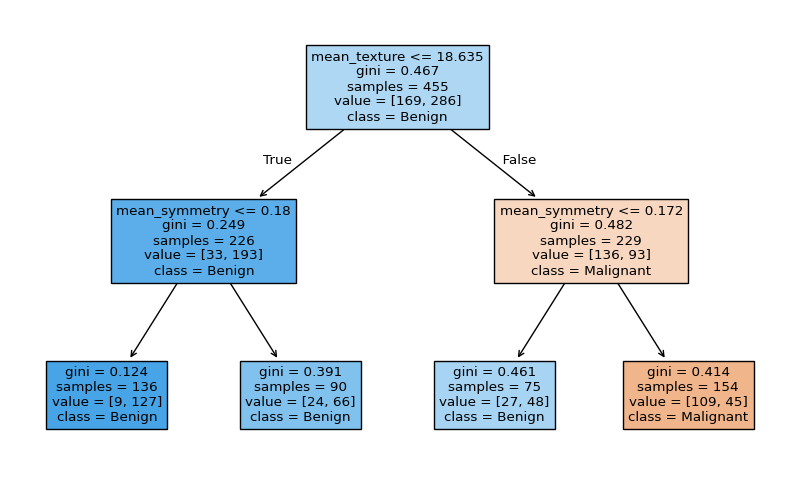

In [7]:
txt_representation = export_text(decision_tree_bc, feature_names=['mean_texture', 'mean_symmetry'])
print(txt_representation)
plt.figure(figsize=(10, 6))
plot_tree(decision_tree_bc, feature_names=['mean_texture', 'mean_symmetry'], class_names=['Malignant', 'Benign'], filled=True)
plt.savefig("bc.png")

In [8]:
size = 300
X = np.random.rand(size) * 5 - 2.5
y = 1*(X**4) + 2*(X**3) + 1*(X**2) - 4*X + 2 + np.random.randn(size)*8 - 4
df = pd.DataFrame({'x': X, 'y': y})

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(df[['x']], df['y'], test_size=0.2, random_state=42)

In [9]:
best_depth_reg = 1
best_mse = float('inf')
for depth in range(1, 21):
    reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    reg.fit(X_train_reg, y_train_reg)
    mse = mean_squared_error(y_test_reg, reg.predict(X_test_reg))
    if mse < best_mse:
        best_mse = mse
        best_depth_reg = depth

In [10]:
decision_tree_reg = DecisionTreeRegressor(max_depth=best_depth_reg, random_state=42)
decision_tree_reg.fit(X_train_reg, y_train_reg)


mse_train = mean_squared_error(y_train_reg, decision_tree_reg.predict(X_train_reg))
mse_test = mean_squared_error(y_test_reg, decision_tree_reg.predict(X_test_reg))

|--- x <= 1.94
|   |--- x <= -1.76
|   |   |--- x <= -2.30
|   |   |   |--- x <= -2.47
|   |   |   |   |--- x <= -2.48
|   |   |   |   |   |--- value: [21.93]
|   |   |   |   |--- x >  -2.48
|   |   |   |   |   |--- value: [9.46]
|   |   |   |--- x >  -2.47
|   |   |   |   |--- x <= -2.47
|   |   |   |   |   |--- value: [43.11]
|   |   |   |   |--- x >  -2.47
|   |   |   |   |   |--- value: [22.59]
|   |   |--- x >  -2.30
|   |   |   |--- x <= -1.98
|   |   |   |   |--- x <= -2.14
|   |   |   |   |   |--- value: [11.35]
|   |   |   |   |--- x >  -2.14
|   |   |   |   |   |--- value: [18.97]
|   |   |   |--- x >  -1.98
|   |   |   |   |--- x <= -1.80
|   |   |   |   |   |--- value: [8.25]
|   |   |   |   |--- x >  -1.80
|   |   |   |   |   |--- value: [17.73]
|   |--- x >  -1.76
|   |   |--- x <= 1.76
|   |   |   |--- x <= 1.23
|   |   |   |   |--- x <= -0.51
|   |   |   |   |   |--- value: [3.72]
|   |   |   |   |--- x >  -0.51
|   |   |   |   |   |--- value: [-1.72]
|   |   |   |--- x

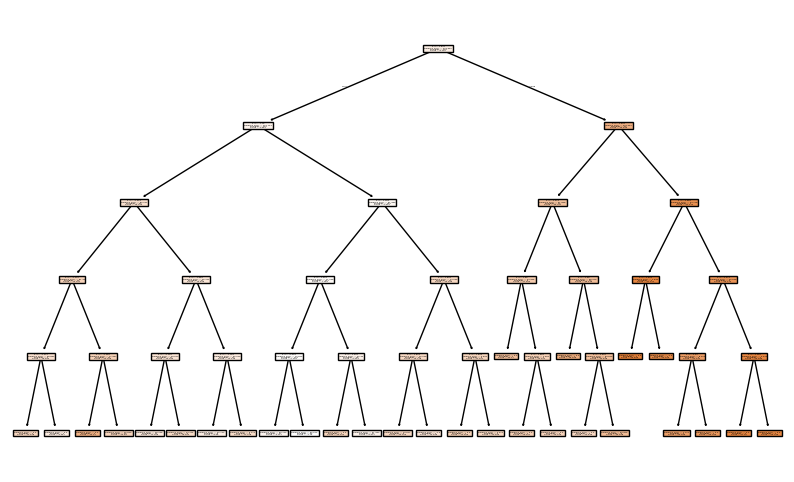

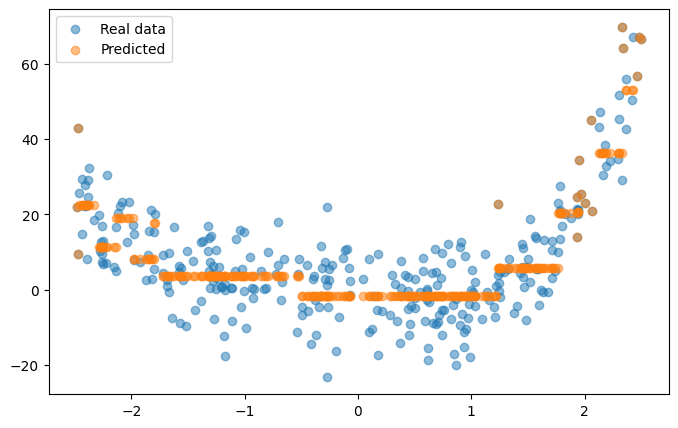

In [11]:
with open("mse_tree.pkl", "wb") as f:
    pickle.dump([best_depth_reg, mse_train, mse_test], f)

txt_representation_reg = export_text(decision_tree_reg, feature_names=['x'])
print(txt_representation_reg)
plt.figure(figsize=(10, 6))
plot_tree(decision_tree_reg, feature_names=['x'], filled=True)
plt.savefig("reg.png")

plt.figure(figsize=(8, 5))
plt.scatter(df['x'], df['y'], label='Real data', alpha=0.5)
plt.scatter(df['x'], decision_tree_reg.predict(df[['x']]), label='Predicted', alpha=0.5)
plt.legend()
plt.savefig("regression_results.png")
plt.show()
